In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
df=pd.read_csv("customer_churn.csv")

In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
customer_5 = df.iloc[:, 4] 
print(customer_5)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object


In [5]:
customer_15 = df.iloc[:, 14] 

In [6]:
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]

In [67]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100.0)]

In [10]:
two_mail_yes = df[(df['Contract'] == 'Two Year') & (df['PaymentMethod'] == 'Mailed Check') & (df['Churn'] == 'Yes')]

In [11]:
customer_333 = df.sample(n=333, random_state=42)

In [14]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

No     5174
Yes    1869
Name: Churn, dtype: int64


In [16]:
internet_service_counts = df['InternetService'].value_counts()
print(internet_service_counts)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


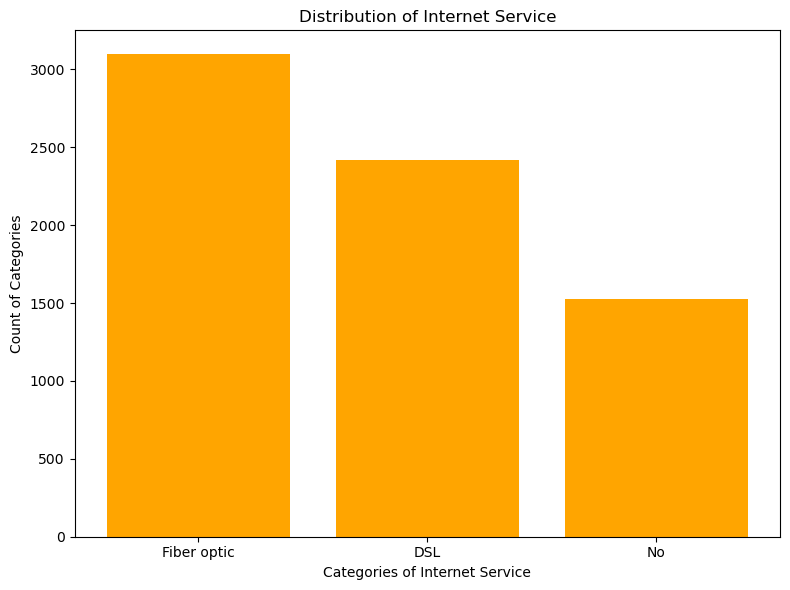

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(internet_service_counts.index, internet_service_counts.values, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.tight_layout()
plt.show()

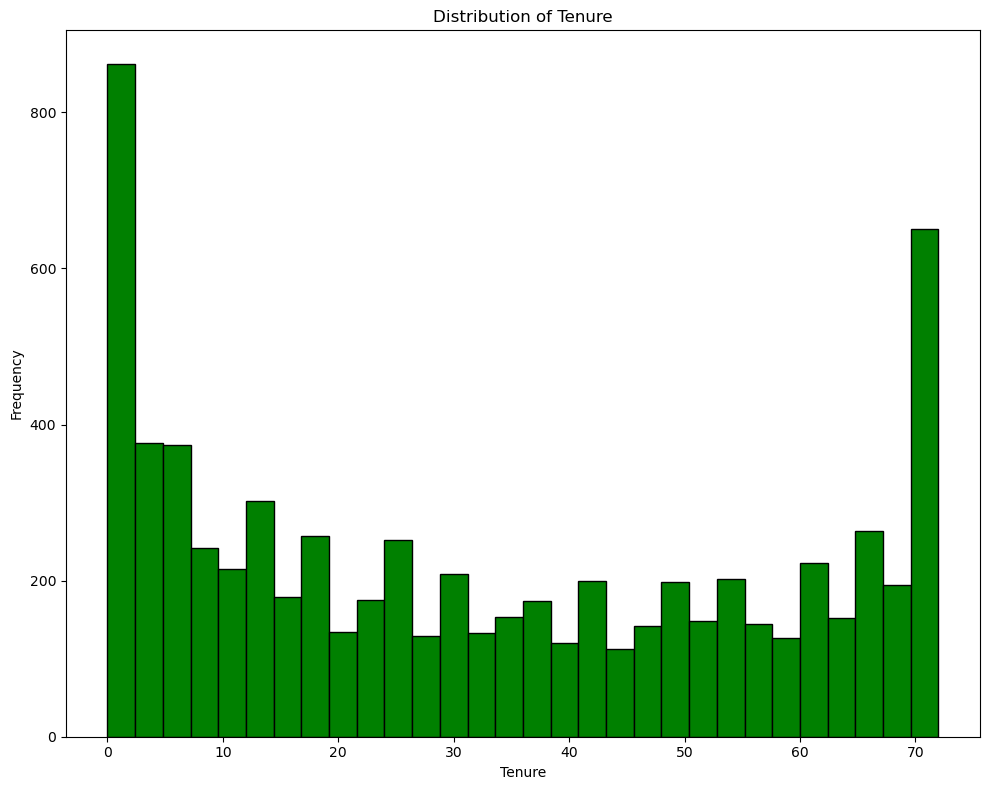

In [55]:
plt.figure(figsize=(10, 8))
plt.hist(df['tenure'], bins=30, color='green', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

plt.title('Distribution of Tenure')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

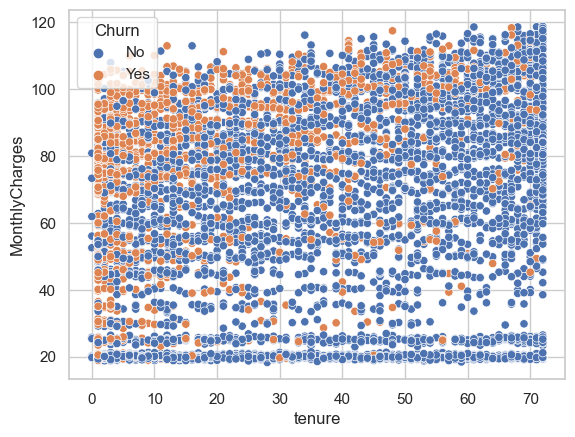

In [74]:

sns.scatterplot(x=df['tenure'] ,y= df['MonthlyCharges'], hue=df['Churn'])


<Figure size 800x600 with 0 Axes>

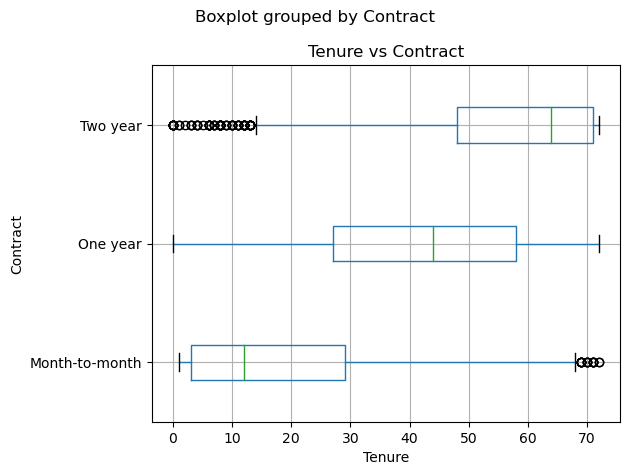

In [24]:
plt.figure(figsize=(8, 6)) 
df.boxplot(column='tenure', by='Contract', vert=False)
plt.xlabel('Tenure')
plt.ylabel('Contract')
plt.title('Tenure vs Contract')
plt.tight_layout()
plt.show()



In [29]:
X = df[['tenure']]
y = df['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {error}')

Root Mean Squared Error: 29.07936015646814


In [48]:
X = df[['MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[1797    0]
 [ 669    0]]
Accuracy: 0.7287104622871047


In [42]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[944  92]
 [193 180]]
Accuracy: 0.7977288857345636


In [46]:
X = df[['tenure']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[951  85]
 [257 116]]
Accuracy: 0.7572746628814763


In [44]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[1329  210]
 [ 302  272]]
Accuracy: 0.7576904874585897
